In [124]:
# 문제정의
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [126]:
train = pd.read_csv("./data/Train.csv")
test = pd.read_csv("./data/test.csv")
submission = pd.read_csv('./data/sampleSubmission.csv')

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  5423 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6049 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     3468 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


In [128]:
trainDf=pd.DataFrame(train)
testDf=pd.DataFrame(test)

In [129]:
# 데이터 전처리
trainDf.drop('ID',axis = 1, inplace = True)
testDf.drop('ID',axis = 1, inplace = True)

In [130]:
trainDf.drop('Gender', axis =1, inplace = True)
testDf.drop('Gender', axis =1, inplace = True)

In [131]:
# trainDf.corr()

In [132]:
trainDf.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,5423.000000,6999.000000,6999.000000,6049.000000,3468.000000,6999.000000
mean,4.054582,3.023718,214.249178,3.576294,13.269031,0.594656
std,1.131019,2.149861,208.294273,1.530933,16.070188,0.490993
min,2.000000,1.000000,96.000000,2.000000,1.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,1.000000
max,7.000000,99.000000,9999.000000,10.000000,65.000000,1.000000


In [133]:
trainDf['Prior_purchases'].median()

3.0

In [134]:
trainDf['Customer_care_calls'].median()

4.0

In [135]:
# Mode_of_Shipment
trainDf['Mode_of_Shipment'] = trainDf['Mode_of_Shipment'].replace(' Ship','Ship') # 공백 제거
trainDf['Mode_of_Shipment'] = trainDf['Mode_of_Shipment'].replace(' Road','Road') # 공백 제거
trainDf['Mode_of_Shipment'] = trainDf['Mode_of_Shipment'].replace(' Flight','Flight') # 공백 제거
trainDf['Mode_of_Shipment'] = trainDf['Mode_of_Shipment'].replace(' Shipzk','Ship') # 오타
trainDf['Mode_of_Shipment'] = trainDf['Mode_of_Shipment'].replace(' Roadzk','Road') # 오타 
trainDf['Mode_of_Shipment'] = trainDf['Mode_of_Shipment'].replace(' Flightzk','Flight') # 오타
trainDf['Mode_of_Shipment'] = trainDf['Mode_of_Shipment'].replace('?','Ship') # 비율을 고려해 결측치 채우기
trainDf['Mode_of_Shipment'].value_counts()

testDf['Mode_of_Shipment'].unique()
testDf['Mode_of_Shipment'] = testDf['Mode_of_Shipment'].replace(' Ship','Ship') # 공백 제거
testDf['Mode_of_Shipment'] = testDf['Mode_of_Shipment'].replace(' Road','Road') # 공백 제거
testDf['Mode_of_Shipment'] = testDf['Mode_of_Shipment'].replace(' Flight','Flight') # 공백 제거
testDf['Mode_of_Shipment'] = testDf['Mode_of_Shipment'].replace(' Shipzk','Ship') # 오타
testDf['Mode_of_Shipment'] = testDf['Mode_of_Shipment'].replace(' Roadzk','Road') # 오타 
testDf['Mode_of_Shipment'] = testDf['Mode_of_Shipment'].replace(' Flightzk','Flight') # 오타
testDf['Mode_of_Shipment'] = testDf['Mode_of_Shipment'].replace('?','Ship') # 비율을 고려해 결측치 채우기
testDf['Mode_of_Shipment'].value_counts()
trainDf['Product_importance'].value_counts()

Product_importance
low        3344
medium     2982
high        573
?            97
mediumm       1
loww          1
highh         1
Name: count, dtype: int64

In [136]:
# 결측치가 너무 많으니까 그냥 드랍
trainDf.drop('Discount_offered',axis=1, inplace = True)
testDf.drop('Discount_offered',axis=1, inplace = True)
trainDf.columns
trainDf['Warehouse_block '].unique()
trainDf['Mode_of_Shipment'].unique()
trainDf['Product_importance'].unique()
trainDf['Weight_in_gms'][trainDf['Weight_in_gms']=='?']
trainDf['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      4883
Road      1076
Flight    1040
Name: count, dtype: int64

In [137]:
# 비율을 고려해 결측치 채우기
testDf['Product_importance'].value_counts()

# Weight_in_gms
trainDf['Weight_in_gms'].unique()
trainDf['Weight_in_gms'].value_counts()
trainDf['Weight_in_gms'][train['Weight_in_gms']=='?']

47      ?
65      ?
67      ?
82      ?
90      ?
       ..
6889    ?
6914    ?
6945    ?
6972    ?
6975    ?
Name: Weight_in_gms, Length: 446, dtype: object

In [138]:
# 0인 값을 제외한 기술통계
trainDf['Weight_in_gms'][trainDf['Weight_in_gms']!=0].describe()

count     6999
unique    3332
top          ?
freq       446
Name: Weight_in_gms, dtype: object

In [139]:
# '?'를 숫자로 바꿀 수 없으니 일단 0으로 치환
trainDf['Weight_in_gms'] = trainDf['Weight_in_gms'].replace('?',0)
testDf['Weight_in_gms'] = testDf['Weight_in_gms'].replace('?',0)
trainDf['Weight_in_gms'][trainDf['Weight_in_gms']=='?']

Series([], Name: Weight_in_gms, dtype: object)

In [140]:
# 숫자로 바꾼다
trainDf['Weight_in_gms'] = pd.to_numeric(trainDf['Weight_in_gms'])
testDf['Weight_in_gms'] = pd.to_numeric(testDf['Weight_in_gms'])
trainDf.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Weight_in_gms,Reached.on.Time_Y.N
count,5423.000000,6999.000000,6999.000000,6049.000000,6999.000000,6999.000000
mean,4.054582,3.023718,214.249178,3.576294,3423.769967,0.594656
std,1.131019,2.149861,208.294273,1.530933,1818.799917,0.490993
min,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,1674.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,4064.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,5005.000000,1.000000
max,7.000000,99.000000,9999.000000,10.000000,7846.000000,1.000000


In [141]:
#prior_purchases
trainDf['Prior_purchases'].fillna(3.5, inplace = True)
testDf['Prior_purchases'].fillna(3.5, inplace = True)

In [142]:
# # Discount_offered는 표준편차가 높고 극단적인 값(65)이 있기 때문에 중앙값을 사용한다
# trainDf['Discount_offered'].fillna(7, inplace = True)
# testDf['Discount_offered'].fillna(7, inplace = True)

#아예 없애버림

In [143]:
#customer rating!

trainDf['Customer_rating'][trainDf['Customer_rating']!=99].mean()
#99 빼도 결국 평균은 3

2.9962841217664713

In [144]:
#여기서부턴 변동 가능성..!

In [145]:
# 0으로 바꿨던 값을 0을 제외한 평균값으로 바꿔준다
trainDf['Weight_in_gms'] = trainDf['Weight_in_gms'].replace(0,3657)
testDf['Weight_in_gms'] = testDf['Weight_in_gms'].replace(0,3657)
trainDf['Customer_rating'].value_counts()
trainDf['Customer_rating'] = trainDf['Customer_rating'].replace(99,3)
trainDf['Customer_rating'].value_counts()
testDf['Customer_rating'] = testDf['Customer_rating'].replace(99,3) 
testDf['Customer_rating'].value_counts()

Customer_rating
1    843
4    831
3    790
5    772
2    764
Name: count, dtype: int64

In [146]:
# 이상치를 제외한 값의 평균

trainDf['Cost_of_the_Product'][trainDf['Cost_of_the_Product']!=9999].mean()
trainDf['Cost_of_the_Product'][trainDf['Cost_of_the_Product']!=9999].median()


214.0

In [147]:
#엥 평균값이면 200이 아니라 210일텐데...
#230810_1024

In [148]:
# 이상치 제거
trainDf['Cost_of_the_Product'][trainDf['Cost_of_the_Product']==9999]
# 이상치를 제외한 값의 평균
trainDf['Cost_of_the_Product'][trainDf['Cost_of_the_Product']!=9999].mean()
# 평균값으로 변경
trainDf['Cost_of_the_Product'] = trainDf['Cost_of_the_Product'].replace(9999,214)
testDf['Cost_of_the_Product'] = testDf['Cost_of_the_Product'].replace(9999,214)

In [149]:
#everyday

## 여기부터!!!

### customer_care_calls

In [150]:
pt1 = trainDf[['Customer_care_calls', 'Customer_rating', 'Mode_of_Shipment']].groupby(['Customer_rating', 'Mode_of_Shipment']).agg(lambda x: x.mode().iloc[0])
pt1

Customer_care_calls
Customer_rating Mode_of_Shipment                     
1               Flight                            4.0
                Road                              3.0
                Ship                              3.0
2               Flight                            5.0
                Road                              4.0
                Ship                              4.0
3               Flight                            4.0
                Road                              4.0
                Ship                              4.0
4               Flight                            4.0
                Road                              4.0
                Ship                              4.0
5               Flight                            3.0
                Road                              4.0
                Ship                              4.0

In [151]:
def fill_calls(row) :
    if np.isnan(row['Customer_care_calls']):
        return pt1.loc[(row['Customer_rating'], row['Mode_of_Shipment'])]
    else:
        return row['Customer_care_calls']

In [152]:
pt1.loc[(2, 'Road')]

Customer_care_calls    4.0
Name: (2, Road), dtype: float64

In [153]:
trainDf['Customer_care_calls'] = trainDf.apply(fill_calls, axis = 1).astype('int64')

In [154]:
trainDf['Customer_care_calls'].value_counts()

Customer_care_calls
4    2953
3    1958
5    1188
6     496
2     287
7     117
Name: count, dtype: int64

In [155]:
#test도 적용

In [156]:
testDf['Customer_care_calls'] = testDf.apply(fill_calls, axis = 1).astype('int64')

### product_importance

- 
- 

In [157]:
# Product_importance
trainDf['Product_importance'] = trainDf['Product_importance'].replace('loww','low') # 오타
trainDf['Product_importance'] = trainDf['Product_importance'].replace('highh','high') # 오타 
trainDf['Product_importance'] = trainDf['Product_importance'].replace('mediumm','medium') # 오타
testDf['Product_importance'] = testDf['Product_importance'].replace('loww','low') # 오타
testDf['Product_importance'] = testDf['Product_importance'].replace('highh','high') # 오타 
testDf['Product_importance'] = testDf['Product_importance'].replace('mediumm','medium') # 오타

In [158]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   int64  
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Weight_in_gms        6999 non-null   int64  
 8   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 492.2+ KB


In [159]:
trainDf['Product_importance'].value_counts()

Product_importance
low       3345
medium    2983
high       574
?           97
Name: count, dtype: int64

In [160]:
# #Deck 컬럼 시각화 진행
# sns.countplot(data=trainDf,
#              x='Weight_in_gms',
#              hue='Product_importance',
#              )
# #prior_purchases 좀 재밌네

<Axes: xlabel='Prior_purchases', ylabel='count'>

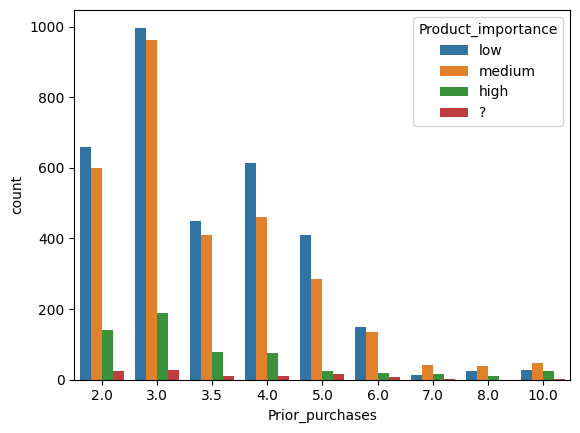

In [161]:
#Deck 컬럼 시각화 진행
sns.countplot(data=trainDf,
             x='Prior_purchases',
             hue='Product_importance',
             )
#prior_purchases 좀 재밌네

<Axes: xlabel='Cost_of_the_Product', ylabel='count'>

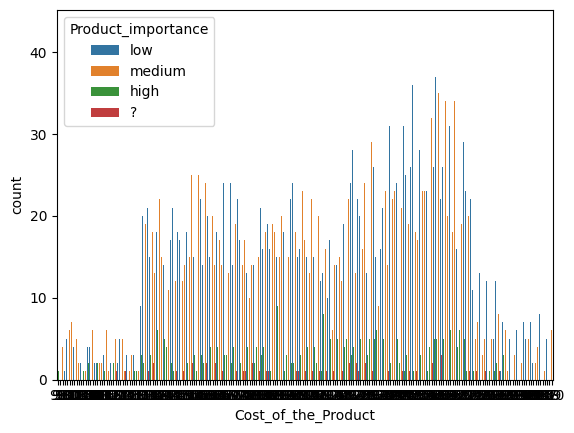

In [162]:
#Deck 컬럼 시각화 진행
sns.countplot(data=trainDf,
             x='Cost_of_the_Product',
             hue='Product_importance',
             )

<Axes: xlabel='Customer_rating', ylabel='count'>

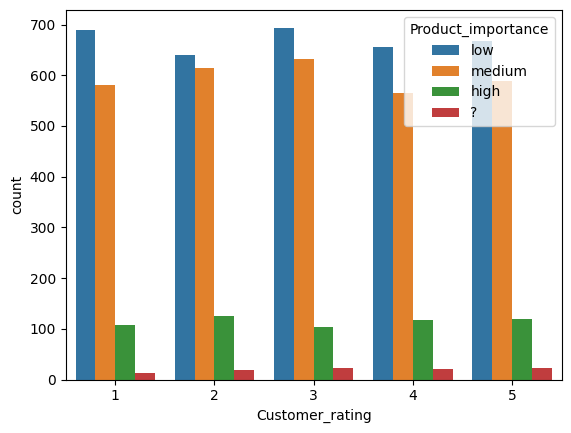

In [163]:
#Deck 컬럼 시각화 진행
sns.countplot(data=trainDf,
             x='Customer_rating',
             hue='Product_importance',
             )
#아무 의미 없ㅇ므

<Axes: xlabel='Customer_care_calls', ylabel='count'>

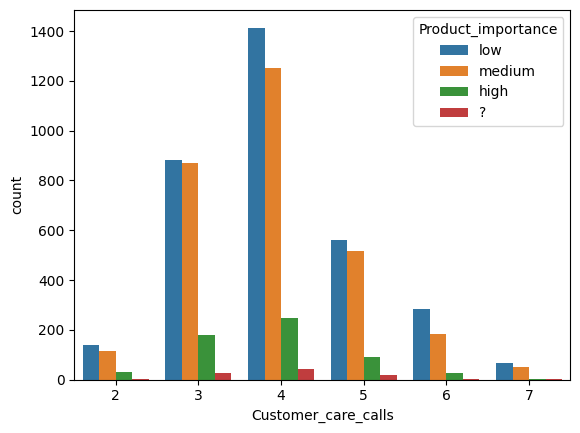

In [164]:
#Deck 컬럼 시각화 진행
sns.countplot(data=trainDf,
             x='Customer_care_calls',
             hue='Product_importance',
             )

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

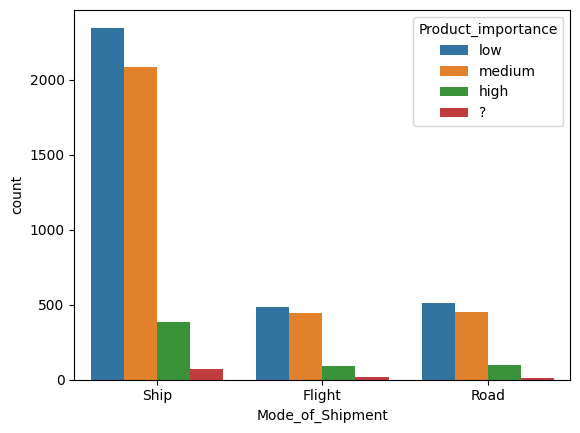

In [165]:
#Deck 컬럼 시각화 진행
sns.countplot(data=trainDf,
             x='Mode_of_Shipment',
             hue='Product_importance',
             )

<Axes: xlabel='Warehouse_block ', ylabel='count'>

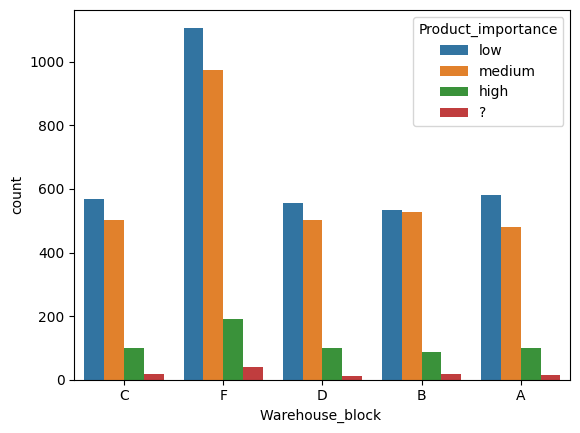

In [166]:
#Deck 컬럼 시각화 진행
sns.countplot(data=trainDf,
             x='Warehouse_block ',
             hue='Product_importance',
             )

In [167]:
Mode_of_Shipment

NameError: name 'Mode_of_Shipment' is not defined

In [168]:
pt2 = trainDf[['Mode_of_Shipment', 'Prior_purchases', 'Product_importance']].groupby(['Mode_of_Shipment','Prior_purchases']).agg(lambda x: x.mode().iloc[0])
pt2
# 요게 그나마 제일 영향력 있는 듯

Product_importance
Mode_of_Shipment Prior_purchases                   
Flight           2.0                            low
                 3.0                         medium
                 3.5                            low
                 4.0                            low
                 5.0                            low
                 6.0                            low
                 7.0                         medium
                 8.0                           high
                 10.0                           low
Road             2.0                            low
                 3.0                            low
                 3.5                            low
                 4.0                         medium
                 5.0                            low
                 6.0                            low
                 7.0                           high
                 8.0                            low
                 10.0                        medium
Ship             2.0                            low
                 3.0                            low
                 3.5                            low
                 4.0                            low
                 5.0                            low
                 6.0                         medium
                 7.0                         medium
                 8.0                         medium
                 10.0                        medium

In [169]:
trainDf['Product_importance'].value_counts()

Product_importance
low       3345
medium    2983
high       574
?           97
Name: count, dtype: int64

In [170]:
#  print(pt2.loc[('Flight',2.0)])

In [171]:
# def fill_calls_2(row) :
#     if np.isnan(row['Product_importance']):
#         return pt2.loc[(row['Mode_of_Shipment'], row['Prior_purchases'])]
#     else:
#         return row['Product_importance']
# #     요게 원래것

In [49]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 3.7 MB/s eta 0:00:00


In [51]:
!pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 9.2 MB/s eta 0:00:00
     -------------------------------------- 181.8/181.8 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 242.5/242.5

In [172]:
from keras.utils import to_categorical


In [109]:
# trainDf['Product_importance'] = pd.Categorical(trainDf['Product_importance'])


In [110]:
# def fill_calls_2(row):
#     if pd.isnull(row['Product_importance']) or row['Product_importance'] == '':
#         return pt2.loc[(row['Mode_of_Shipment'], row['Prior_purchases'])]
#     else:
#         return row['Product_importance']
    

In [111]:
# def fill_calls_2(row):
#     if pd.isnull(row['Product_importance']) or row['Product_importance'] == '':
        
#         ap=pt2.loc[(row['Mode_of_Shipment'], row['Prior_purchases'])]
#     else:
#         return row['Product_importance']
    

In [173]:
trainDf= trainDf.replace('?', pd.NA)


In [180]:
def fill_calls_2(row):
    if pd.isnull(row['Product_importance']) or row['Product_importance'] == '':
        value = pt2.loc[(row['Mode_of_Shipment'], row['Prior_purchases']), 'Product_importance']
        return value
    else:
        return row['Product_importance']

In [ ]:
trainDf

In [181]:
trainDf['Product_importance'] = trainDf.apply(fill_calls_2, axis = 1)

In [182]:
trainDf['Product_importance'].value_counts()
#완료

Product_importance
low       3434
medium    2991
high       574
Name: count, dtype: int64

In [191]:
#test 값에도 적용
testDf= trainDf.replace('?', pd.NA)

In [192]:
testDf['Product_importance'] = testDf.apply(fill_calls_2, axis = 1)

In [193]:
testDf['Product_importance'].value_counts()


Product_importance
low       3434
medium    2991
high       574
Name: count, dtype: int64

In [188]:
#다시 확인
pt2


Product_importance
Mode_of_Shipment Prior_purchases                   
Flight           2.0                            low
                 3.0                         medium
                 3.5                            low
                 4.0                            low
                 5.0                            low
                 6.0                            low
                 7.0                         medium
                 8.0                           high
                 10.0                           low
Road             2.0                            low
                 3.0                            low
                 3.5                            low
                 4.0                         medium
                 5.0                            low
                 6.0                            low
                 7.0                           high
                 8.0                            low
                 10.0                        medium
Ship             2.0                            low
                 3.0                            low
                 3.5                            low
                 4.0                            low
                 5.0                            low
                 6.0                         medium
                 7.0                         medium
                 8.0                         medium
                 10.0                        medium

In [60]:
#시행착오들: 이상하게 나왔었음. 
trainDf['Product_importance'].unique()

array(['low', 'medium', 'high',
       'Product_importance    low\nName: (Road, 5.0), dtype: object',
       'Product_importance    medium\nName: (Flight, 3.0), dtype: object',
       'Product_importance    low\nName: (Ship, 3.0), dtype: object',
       'Product_importance    low\nName: (Ship, 3.5), dtype: object',
       'Product_importance    low\nName: (Ship, 2.0), dtype: object',
       'Product_importance    low\nName: (Flight, 4.0), dtype: object',
       'Product_importance    low\nName: (Ship, 5.0), dtype: object',
       'Product_importance    low\nName: (Ship, 4.0), dtype: object',
       'Product_importance    low\nName: (Road, 3.0), dtype: object',
       'Product_importance    low\nName: (Flight, 2.0), dtype: object',
       'Product_importance    medium\nName: (Ship, 10.0), dtype: object',
       'Product_importance    low\nName: (Flight, 3.5), dtype: object',
       'Product_importance    low\nName: (Road, 6.0), dtype: object',
       'Product_importance    low\nName: (F

In [ ]:
#3656 나온 이유(3423 아닌 잉유) 0인 값은 mean 내는 것에서 제외해서 그럼.
#이게 더 정확함. 

In [61]:
# 결측치 채우고 상관관계 다시 확인
pt1 = train.pivot_table(values = 'Customer_care_calls',
                 index = ['Weight_in_gms'],
                 aggfunc = 'mean')
pt1

,Customer_care_calls
Weight_in_gms,
1001,4.0
1002,4.0
1003,5.5
1005,4.0
1006,5.0
...,...
6000,3.0
6064,2.0
7401,2.0


In [62]:
# 결측치 채우고 상관관계 다시 확인
pt1 = train.pivot_table(values = 'Customer_care_calls',
                 index = ['Weight_in_gms'],
                 aggfunc = 'mean')
pt1

,Customer_care_calls
Weight_in_gms,
1001,4.0
1002,4.0
1003,5.5
1005,4.0
1006,5.0
...,...
6000,3.0
6064,2.0
7401,2.0


## 인코딩!

In [195]:
category=['Warehouse_block ','Mode_of_Shipment','Product_importance']
one_hot_train = pd.get_dummies(trainDf[category])
one_hot_test = pd.get_dummies(testDf[category])


In [196]:

# 원학인코딩후 기존컬럼 제거
trainDf.drop(category, axis=1, inplace=True)
testDf.drop(category, axis=1, inplace=True)

In [197]:
# 원핫인코딩 컬럼 합치기
trainDf=pd.concat([trainDf,one_hot_train], axis=1)
testDf=pd.concat([testDf,one_hot_test], axis=1)


In [198]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   int64  
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Weight_in_gms              6999 non-null   int64  
 5   Reached.on.Time_Y.N        6999 non-null   int64  
 6   Warehouse_block _A         6999 non-null   bool   
 7   Warehouse_block _B         6999 non-null   bool   
 8   Warehouse_block _C         6999 non-null   bool   
 9   Warehouse_block _D         6999 non-null   bool   
 10  Warehouse_block _F         6999 non-null   bool   
 11  Mode_of_Shipment_Flight    6999 non-null   bool   
 12  Mode_of_Shipment_Road      6999 non-null   bool   
 13  Mode_of_Shipment_Ship      6999 non-null   bool 

## 모델 해보기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# 먼저 train의 문제와 답을 분리시켜주기

X_train = trainDf.drop('Reached.on.Time_Y.N', axis=1)
y_train = trainDf['Reached.on.Time_Y.N']
X_test = testDf

In [63]:
# categorical_features = ['Warehouse_block ', 'Mode_of_Shipment', 'Product_importance']
# categorical_features
# train['Warehouse_block ']
# pd.get_dummies(train['Warehouse_block '], prefix = 'Warehouse_block ')
# for feature_name in categorical_features:
#     one_hot = pd.get_dummies(train[feature_name], prefix = feature_name) # One-Hot Encoding
#     train.drop(feature_name, axis = 1, inplace = True) # 기존의 문자형 컬럼 삭제
#     train = pd.concat([train, one_hot], axis=1) # One-Hot Encoding한 숫자형 컬럼을 train컬럼에 붙여준다    
# for feature_name in categorical_features:
#     one_hot = pd.get_dummies(test[feature_name], prefix = feature_name)
#     test.drop(feature_name, axis = 1, inplace = True) 
#     test = pd.concat([test, one_hot], axis=1)    
#     train.shape, test.shape

In [64]:
# 먼저 train의 문제와 답을 분리시켜주기
X_train = train.drop('Reached.on.Time_Y.N', axis=1) # 드랍을 이용한 분리
y_train = train['Reached.on.Time_Y.N']

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   float64
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Weight_in_gms              6999 non-null   int64  
 5   Warehouse_block _A         6999 non-null   uint8  
 6   Warehouse_block _B         6999 non-null   uint8  
 7   Warehouse_block _C         6999 non-null   uint8  
 8   Warehouse_block _D         6999 non-null   uint8  
 9   Warehouse_block _F         6999 non-null   uint8  
 10  Mode_of_Shipment_Flight    6999 non-null   uint8  
 11  Mode_of_Shipment_Road      6999 non-null   uint8  
 12  Mode_of_Shipment_Ship      6999 non-null   uint8  
 13  Product_importance_high    6999 non-null   uint8

In [24]:
# # 데이터 분리
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
# X_train.shape, y_train.shape

In [66]:
# 모델선택
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [67]:
# 모델 학습 및 평가
knn_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(knn_model,X_train,y_train)
result.mean()

0.65309578270193

In [84]:
tree_result = cross_val_score(tree_model,X_train,y_train)
tree_result.mean()

0.6312347595221077

In [68]:
# 교차 검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(knn_model,X_train,y_train)
result.mean()
tree_result = cross_val_score(tree_model,X_train,y_train)
tree_result.mean()

0.6290923108342693

In [ ]:
# 교차 검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(knn_model,X_train,y_train)
result.mean()

In [89]:
# # 하이퍼 파라미터 튜닝
# knn_list = []

# for k in range(1,150,2):
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(X_train,y_train)
#     result = knn_model.score(X_test,y_test)
#     knn_list.append(result)

In [71]:
# RandomForest, ensemble 사용
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5, max_features=0.7, min_samples_leaf=10,
                       n_estimators=1000, n_jobs=-1)
rf_model
rf_model.fit(X_train,y_train)
rf_pre = cross_val_score(rf_model, X_train, y_train, cv = 5)
rf_pre.mean()

0.6732435413050137

In [72]:
X_test = test

In [73]:
# 학습된 모델로 예측 진행하기 - predict()
pre = rf_model.predict(X_test)

In [74]:
len(pre)

4000

In [75]:
omr = pd.read_csv('./data/sampleSubmission.csv')
omr

,ID,Reached.on.Time_Y.N
0,7000,NaN
1,7001,NaN
2,7002,NaN
3,7003,NaN
4,7004,NaN
...,...,...
3995,10995,NaN
3996,10996,NaN
3997,10997,NaN
3998,10998,NaN


In [76]:
omr.shape

(4000, 2)

In [77]:
omr['Reached.on.Time_Y.N'] = pre
omr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   4000 non-null   int64
 1   Reached.on.Time_Y.N  4000 non-null   int64
dtypes: int64(2)
memory usage: 62.6 KB


In [78]:
omr.to_csv('Kaggle_01.csv', index = False)

In [80]:
# RandomForest - Grid Search
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [1000,2000], 
    'max_depth' : [3,5,7], 
    'max_features' : [0.4,0.5,0.6], 
    'min_samples_leaf' : [10,20,30], 
    'n_jobs' : [-1] 
} 
grid = GridSearchCV(rf_model,params,cv=3, verbose=2)
grid.fit(X_train, y_train)
grid.best_params_
# {'max_depth': 5,
#  'max_features': 0.7,
#  'min_samples_leaf': 10,
#  'n_estimators': 1000,
#  'n_jobs': -1}
grid.best_score_
rf_best_model = grid.best_estimator_
rf_best_cross = cross_val_score(rf_best_model, X_train, y_train, cv=5)
rf_best_cross.mean()
rf_best_model.predict(test)
submission['Reached.on.Time_Y.N'] = rf_best_model.predict(test)
submission
omr = pd.read_csv('./data/sampleSubmission.csv')
omr['Reached.on.Time_Y.N'] = pre
omr.to_csv('Kaggle_02.csv', index = False)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=10, n_estimators=1000, n_jobs=-1; total time=   1.4s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=10, n_estimators=1000, n_jobs=-1; total time=   1.5s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=10, n_estimators=1000, n_jobs=-1; total time=   1.0s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=10, n_estimators=2000, n_jobs=-1; total time=   2.3s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=10, n_estimators=2000, n_jobs=-1; total time=   2.0s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=10, n_estimators=2000, n_jobs=-1; total time=   2.6s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=20, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=20, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END max_depth=3, max_features=0.4, min_samples_leaf=2

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=1000,
                          max_depth=5,
                          learning_rate=0.1) # 오차를 얼마나 반영시킬지
gb_model.fit(X_train, y_train)
print(gb_model.score(X_train,y_train))
print(gb_model.score(X_test,y_test))
print(cross_val_score(gb_model,X_train,y_train, cv=5).mean())


In [ ]:
# XGB
from xgboost import XGBClassifier
xgb_model = XGBClassifier(booster='gbtree', # 트리모델로 분류
             objective = 'binary:logistic', 
             n_estimators = 1000,
             max_depth=5,
             learning_rate = 0.01)
xgb_model.fit(X_train,y_train)
print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))
print(cross_val_score(xgb_model,X_train,y_train, cv=5).mean())
params3 = {
    'booster' : ['gbtree'], 
    'objective' : ['binary:logistic'], 
    'n_estimators' : [1000,2000], 
    'max_depth' : [3,5,7],
    'learning_rate' : [0.01,0.05,0.01],
    'n_jobs' : [-1] 
}
grid3 = GridSearchCV(xgb_model,params3,cv=3, verbose=2)
grid3.fit(X_train, y_train)
grid3.best_params_
grid3.best_score_
grid_best_model = grid3.best_estimator_
grid_best_cross = cross_val_score(grid_best_model, X_train, y_train, cv=3)
grid_best_cross.mean()
submission['Reached.on.Time_Y.N'] = grid_best_model.predict(test)
submission
submission.to_csv('KaggleCompetition/xgb2.csv', index = False)

In [28]:
!pip install catboost